In [48]:
#Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns

In [49]:
#Reading the csv file of dataset into panda dataframe

data = pd.read_csv("stress_predict_data.csv")

In [50]:
#Displaying first 6 rows of dataset

data.head()

,Participant,HR,respr,Time(sec),Label
0,2,118.00,12.127693,1644227583,0
1,2,113.50,12.127693,1644227584,0
2,2,93.00,12.127693,1644227585,0
3,2,93.25,12.127693,1644227586,0
4,2,86.40,12.127693,1644227587,0


In [51]:
#Displaying summary of information of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112516 entries, 0 to 112515
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Participant  112516 non-null  int64  
 1   HR           112472 non-null  float64
 2   respr        112516 non-null  float64
 3   Time(sec)    112516 non-null  int64  
 4   Label        112516 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 4.3 MB


In [52]:
#Displaying unique values of column in dataset

data.nunique()

Participant       34
HR              5084
respr          86444
Time(sec)      87120
Label              2
dtype: int64

In [53]:
#Displaying number of missing values(null) in dataset

data.isnull().sum()

Participant     0
HR             44
respr           0
Time(sec)       0
Label           0
dtype: int64

In [54]:
#Cleaning dataset by removing missing values

data_cleaned = data.dropna(subset=['HR'])

0    75657
1    36815
Name: Label, dtype: int64
Imbalance ratio:  2.0550590791796823


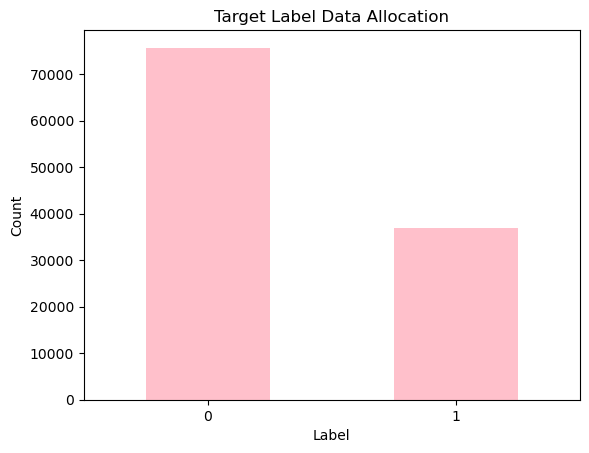

In [55]:
#Calculating number of unique values in "Label" column

label_number = data_cleaned['Label'].value_counts()
print(label_number)

#Calculating imbalance ratio by diving majority count by minority count

imbalance_ratio = label_number[0] / label_number[1]
print('Imbalance ratio: ', imbalance_ratio)

#Plotting bar graph to show the allocation of target label

label_number.plot(kind='bar', rot=0, color='pink')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Target Label Data Allocation')
plt.show()

In [56]:
#Assigning independent and dependent variable from processed dataset

independent_variable = data_cleaned.iloc[:,1:4]
dependent_variable = data_cleaned.iloc[:, 4]

print(independent_variable)
print(dependent_variable)

            HR      respr   Time(sec)
0       118.00  12.127693  1644227583
1       113.50  12.127693  1644227584
2        93.00  12.127693  1644227585
3        93.25  12.127693  1644227586
4        86.40  12.127693  1644227587
...        ...        ...         ...
112511   65.45  11.546524  1646842243
112512   65.47  11.520924  1646842244
112513   65.50  11.495324  1646842245
112514   65.50  11.466879  1646842246
112515   65.50  11.441279  1646842247

[112472 rows x 3 columns]
0         0
1         0
2         0
3         0
4         0
         ..
112511    0
112512    0
112513    0
112514    0
112515    0
Name: Label, Length: 112472, dtype: int64


In [57]:
#Splitting the dataset into training set and testing set using "train_test_split" function

X_train, X_test, y_train, y_test = train_test_split(independent_variable, dependent_variable, test_size = 0.3, 
                                                    random_state = 0)

#Performing feature scaling using standardscaler to make independent variables on same scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
#Applying Random Forest Algorithm to train the dataset

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
#%%timeit used to calculate the time taken by algorithm to make prediction

#Predicting the results using test set and also using timeit to record the time taken by model

y_pred = model.predict(X_test)

479 ms ± 5.08 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
#Finding accuracy score of the model

accuracy_RandomForest = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_RandomForest)

Accuracy: 0.9836702033074507


In [18]:
#Finding preicision score of the model

precision__RandomForest = precision_score(y_test,y_pred)
print("Precision:", precision__RandomForest)

Precision: 0.9885295223768334


In [19]:
#Finding recall of the model

recall__RandomForest = recall_score(y_test,y_pred)
print("Recall:", recall__RandomForest)

Recall: 0.9607968564379055


In [20]:
#Finding fi score of the model

f1_score_RandomForest = f1_score(y_test,y_pred)
print("F1 Score:", f1_score_RandomForest)

F1 Score: 0.9744659159367904


In [62]:
#Applying Xgboost algorithm to train the dataset

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
#%%timeit used to calculate the time taken by algorithm to make prediction

#Predicting the results using test set and also using timeit to record the time taken by model

y_pred = model.predict(X_test)

19.7 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
#Finding accuracy score of the model

accuracy_Xgboost = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_Xgboost)

Accuracy: 0.9505660601031356


In [24]:
#Finding preicision score of the model

precision__Xgboost = precision_score(y_test,y_pred)
print("Precision:", precision__Xgboost)

Precision: 0.9395317979338451


In [25]:
#Finding recall of the model

recall__Xgboost = recall_score(y_test,y_pred)
print("Recall:", recall__Xgboost)

Recall: 0.9058759024033629


In [26]:
#Finding fi score of the model

f1_score_Xgboost = f1_score(y_test,y_pred)
print("F1 Score:", f1_score_Xgboost)

F1 Score: 0.9223969479854843


In [29]:
#Comparing the performance metrics of both the algorithms

mlaName = ['Random Forest Algorithm','Xgboost Algorithm']
mlaAccuracy = [accuracy_RandomForest, accuracy_Xgboost]
mlaPrecision = [precision__RandomForest, precision__Xgboost]
mlaRecall = [recall__RandomForest, recall__Xgboost]
mlaF1Score = [f1_score_RandomForest, f1_score_Xgboost]

# Creating a DataFrame to store the values
comparison = pd.DataFrame({
    'MLA Name': mlaName,
    'MLA Accuracy': mlaAccuracy,
    'MLA Precision': mlaPrecision,
    'MLA Recall': mlaRecall,
    'MLA F1 Score': mlaF1Score
})

# Rounding the values to 4 decimal places
comparison = comparison.round({'MLA Accuracy': 4, 'MLA Precision': 4, 'MLA Recall': 4, 'MLA F1 Score': 4})

In [30]:
comparison

,MLA Name,MLA Accuracy,MLA Precision,MLA Recall,MLA F1 Score
0,Random Forest Algorithm,0.9837,0.9885,0.9608,0.9745
1,Xgboost Algorithm,0.9506,0.9395,0.9059,0.9224
